# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [79]:

df_descr = pd.read_csv('data\otp_description.csv', sep='\t', encoding='utf8')

In [80]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [81]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [82]:
df_train.shape

(15223, 52)

In [83]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [84]:
df_test.shape

(14910, 52)

In [85]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [86]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [87]:
df = df_test.append(df_train).reset_index(drop=True)

In [88]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего строки.


Давайте выведем эти значения для каждого столбца

In [90]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Среднее', 'Два и более высших образования', 'Высшее', 'Неоконченное высшее', 'Среднее специальное', 'Неполное среднее'}


MARITAL_STATUS
{'Состою в браке', 'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Ресторанный бизнес/Общественное питание', 'Подбор персонала', 'Другие сферы', 'Недвижимость', 'ЧОП/Детективная д-ть', 'Сельское хозяйство', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Маркетинг', 'Страхование', 'Наука', 'Юридические услуги/нотариальные услуги', 'Логистика', 'Информационные технологии', 'Государственная служба', 'Сборочные производства', 'Коммунальное хоз-во/Дорожные службы', 'Торговля', 'Нефтегазовая промышленность', 'Развлечения/Искусство', 'Салоны красоты и здоровья', 'Банк/Финансы', 'Металлургия/Промышленность/Машиностроение', 'Строительство', 'Здравоохранение', 'Транспорт', 'Туризм', 'Управляющая компания', 'Информационные услуги', 'Образование'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [91]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Пропуски в данных конечно же есть. Попробуем понять какие данные стоит попытаться заполнить, а какими можно пожертвовать. Пропуски у нас в полях, которые видны в запросе. Пропусков подозрительно одинаково в полях от GEN_INDUSTRY до JOB_DIR. Проверим, не в одних ли и тех же строках отсутствует информация? Для этого достаточно сделать отсеску по одной и посмотреть на остальные. Как видно из запроса, предположение подтвердилось. Если эти данные отбросить, то мы теряем 10% процентов данных. Мы без труда можем заполнить их значениями типа "другое". Но такие данные как работа и должность безусловно являются важными. Есди в заполненных данных будет велик процент "другого", тогда, пожалуй, их следует оставить. Если же процент "другого" мал, то оставим лишь некоторые. Видим, что строк с должностью 'Другое' всего 355 штук, что составляет 1% от данных. Если мы заполним неопредедённые данные этим самым 'Другое', то мы размоёи наши данные до 10%. Хорошо бы иметь информацию, насколько нормальна ситуация с неопределённой длжностью Предположим, что это ненормально и эти строки удалим.

In [92]:
qqq=[]
for i in df.columns:
    if 1 in  set(df[i].isnull()):
        qqq.append(i)
df_descr[df_descr['ПОЛЕ'].isin(qqq)]

,ПОЛЕ,ОПИСАНИЕ
9,GEN_INDUSTRY,отрасль работы клиента
10,GEN_TITLE,должность
11,ORG_TP_STATE,форма собственности компании
12,ORG_TP_FCAPITAL,отношение к иностранному капиталу
13,JOB_DIR,направление деятельности в нутри компании
19,TP_PROVINCE,"область торговой точки, где клиент брал послед..."
20,REGION_NM,регион РФ
39,WORK_TIME,время работы на текущем месте (в месяцах)
50,PREVIOUS_CARD_NUM_UTILIZED,количество уже утилизированных карт ( если пус...


In [93]:
#df[~df.GEN_INDUSTRY.isnull()].info()
#df[df.GEN_TITLE == 'Другое'].info()
#df[['TARGET', 'TP_PROVINCE']].groupby('TP_PROVINCE').count().sort_values('TARGET', ascending=False)
#df[['TARGET', 'FACT_ADDRESS_PROVINCE']].groupby('FACT_ADDRESS_PROVINCE').count().sort_values('TARGET', ascending=False)
#df[['TARGET', 'REG_ADDRESS_PROVINCE']].groupby('REG_ADDRESS_PROVINCE').count().sort_values('TARGET', ascending=False)
df[['TARGET', 'REGION_NM']].groupby('REGION_NM').count().sort_values('TARGET', ascending=False)
#df.REGION_NM
#df.REGION_NM.mode()


,TARGET
REGION_NM,
ЮЖНЫЙ,4248
ЦЕНТРАЛЬНЫЙ 2,3839
ЗАПАДНО-СИБИРСКИЙ,3616
ЦЕНТРАЛЬНЫЙ 1,3284
ПОВОЛЖСКИЙ,2871
ПРИВОЛЖСКИЙ,2538
ВОСТОЧНО-СИБИРСКИЙ,2471
УРАЛЬСКИЙ,2441
ДАЛЬНЕВОСТОЧНЫЙ,2211


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальных признаков с малой вариативностью и большой значимостью нужно оставлять. Раз уж мы так заботились о должности, то колонку GEN_TITLE и ORG_TP_STATE сохраним а GEN_INDUSTRY, ORG_TP_FCAPITAL и JOB_DIR удалим. С региональными признаками сложнее. Их много и они имеют высокую вариативность. Явных лидеров нет, так что информация важна. Потратив некоторое количество усилий провел аннализ и выяснил, что чаще всего TP_PROVINCE не совпадает с прочими "PROVINCE" полями. По-хорошему, нужно было бы тренировать со всеми и потом удаляя проверять значимость, но не очень хочется так поступать. Поэтому оставляем только REGION_NM, а остальные удаляем.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [94]:
def preproc_data(df_input):
    df_output = df_input.copy()
    ## Your Code Here
    df_output=df_output.drop(['AGREEMENT_RK', 'GEN_INDUSTRY', 'ORG_TP_FCAPITAL', 'JOB_DIR','TP_PROVINCE',
             'FACT_ADDRESS_PROVINCE', 'REG_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE',
             'PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
    df_output = df_output[~df_output.GEN_TITLE.isnull()]
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')        
    df_output.REGION_NM[df_output.REGION_NM.isnull()] = 'ЮЖНЫЙ'
    df_output.WORK_TIME[df_output.WORK_TIME.isnull()] = df_output.WORK_TIME.median()
    df_output = pd.get_dummies(df_output)
    return df_output

In [95]:
df_preproc = df.pipe(preproc_data)
df_train_preproc = df_preproc.query('sample_test == 0').drop(['sample_test', 'sample_train'], axis=1)
df_test_preproc = df_preproc.query('sample_test == 1').drop(['sample_test', 'sample_train'], axis=1)



C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [96]:
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 0 to 14909
Data columns (total 82 columns):
TARGET                                         13564 non-null int64
AGE                                            13564 non-null int64
SOCSTATUS_WORK_FL                              13564 non-null int64
SOCSTATUS_PENS_FL                              13564 non-null int64
GENDER                                         13564 non-null int64
CHILD_TOTAL                                    13564 non-null int64
DEPENDANTS                                     13564 non-null int64
PERSONAL_INCOME                                13564 non-null float64
REG_FACT_FL                                    13564 non-null int64
FACT_POST_FL                                   13564 non-null int64
REG_POST_FL                                    13564 non-null int64
REG_FACT_POST_FL                               13564 non-null int64
REG_FACT_POST_TP_FL                            13564 non-null int64
FL_PR

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

    Имеем три датасета: df_preproc, df_test_preproc и df_train_preproc
    Работаем с df_preproc, предварительно удалив из него лишние колонки 'sample_test' и  'sample_train'. Когда выберем лучшую модель, переобучим её на df_train_preproc и попробуем предсказать для df_test_preproc

In [97]:
y = df_preproc.TARGET
df_preproc=df_preproc.drop(['TARGET', 'sample_test', 'sample_train'], axis=1)
from sklearn.cross_validation import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df_preproc, y, test_size=0.33, random_state=42)

#### Задание 5. Обучение и оценка качества разных моделей

In [99]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here


In [100]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test)
predict_dtc_pr = dtc.predict_proba(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('precision', precision_score(y_test, predict_dtc))
print('recall', recall_score(y_test, predict_dtc))
print('accuracy', accuracy_score(y_test, predict_dtc))
print('f1', f1_score(y_test, predict_dtc))

precision 0.1509584664536741
recall 0.16637323943661972
accuracy 0.7778760083987181
f1 0.15829145728643218


In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)
predict_rfc_pr = rfc.predict_proba(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('precision', precision_score(y_test, predict_rfc))
print('recall', recall_score(y_test, predict_rfc))
print('accuracy', accuracy_score(y_test, predict_rfc))
print('f1', f1_score(y_test, predict_rfc))

precision 0.14754098360655737
recall 0.007922535211267605
accuracy 0.8697093601502929
f1 0.015037593984962407


In [103]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
predict_lr_pr = lr.predict_proba(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('precision', precision_score(y_test, predict_lr))
print('recall', recall_score(y_test, predict_lr))
print('accuracy', accuracy_score(y_test, predict_lr))
print('f1', f1_score(y_test, predict_lr))

precision 0.0
recall 0.0
accuracy 0.874019228644049
f1 0.0


In [104]:
# Посчитать метрики стандартные
# accuracy, precision, recall


## Your Code Here
#from sklearn.cross_validation import cross_val_score



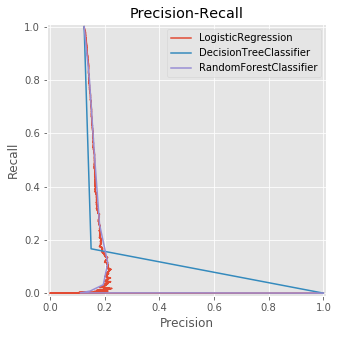

In [105]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
from sklearn.metrics import precision_recall_curve
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, predict_lr_pr[:,1])
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, predict_rfc_pr[:,1])
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_test, predict_dtc_pr[:,1])

from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure(figsize=(5, 5))
plt.plot(precision_lr, recall_lr, label='LogisticRegression')
plt.plot(precision_dtc, recall_dtc, label='DecisionTreeClassifier')
plt.plot(precision_rfc, recall_rfc, label='RandomForestClassifier')
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.grid(True)
plt.title('Precision-Recall')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()
## Your Code Here

LogisticRegression:  0.5957883977694043
DecisionTreeClassifier:  0.516018668246049
RandomForestClassifier:  0.591867122741504


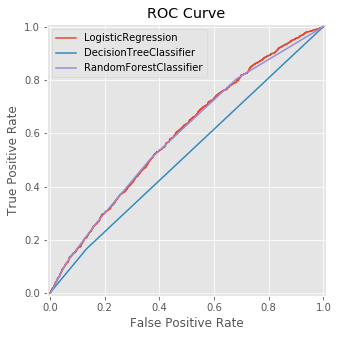

In [106]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
from sklearn.metrics import roc_auc_score, roc_curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predict_lr_pr[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predict_rfc_pr[:,1])
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, predict_dtc_pr[:,1])

from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure(figsize=(5, 5))
plt.plot(fpr_lr, tpr_lr, label='LogisticRegression')
plt.plot(fpr_dtc, tpr_dtc, label='DecisionTreeClassifier')
plt.plot(fpr_rfc, tpr_rfc, label='RandomForestClassifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.title('ROC Curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()
## Your Code Here

print('LogisticRegression: ', roc_auc_score(y_test, predict_lr_pr[:,1]))
print('DecisionTreeClassifier: ', roc_auc_score(y_test, predict_dtc_pr[:,1]))
print('RandomForestClassifier: ', roc_auc_score(y_test, predict_rfc_pr[:,1]))

In [107]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

av_lr=0
av_rfc=0
av_dtc=0
cvc_dtc = cross_val_score(dtc, df_preproc, y, scoring='roc_auc', cv=10)
cvc_rfc = cross_val_score(rfc, df_preproc, y, scoring='roc_auc', cv=10)
cvc_lr = cross_val_score(lr, df_preproc, y, scoring='roc_auc', cv=10)
for v in cvc_dtc:
     av_dtc += v/10
for v in cvc_rfc:
     av_rfc += v/10
for v in cvc_lr:
     av_lr += v/10
           

print('DecisionTreeClassifier:', cvc_dtc, 'aver = ',  av_dtc)
print('RandomForestClassifier: ', cvc_rfc, 'aver = ',  av_rfc)
print('LogisticRegression: ', cvc_lr, 'aver = ',  av_lr)
            

 ## Your Code Here

DecisionTreeClassifier: [0.52746922 0.52062906 0.52016536 0.51474592 0.51997451 0.53196209
 0.51496197 0.53246982 0.5043348  0.50880323] aver =  0.5195515986139888
RandomForestClassifier:  [0.62222242 0.59019989 0.59613713 0.56647486 0.58983546 0.59323956
 0.60755157 0.57651912 0.58099078 0.57635503] aver =  0.5899525829557675
LogisticRegression:  [0.57722626 0.6085703  0.56751193 0.62714857 0.6170803  0.61997427
 0.61659897 0.57895337 0.60409188 0.58427649] aver =  0.6001432336454143


In [108]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
# Лучшей моделью признаём LogisticRegression. Берём df_train_preproc
#df_train_preproc.info()
y_train = df_train_preproc.TARGET
df_train_preproc=df_train_preproc.drop(['TARGET'], axis=1)
# обучаем заново модель, но уже без тестовых данных
lr.fit(df_train_preproc, y_train)
#готовим тестовые данные
y_test = df_test_preproc.TARGET
df_test_preproc=df_test_preproc.drop(['TARGET'], axis=1)
# и делаем предсказание с вероятностями и без
predict = lr.predict(df_test_preproc)
predict_pr = lr.predict_proba(df_test_preproc)
## Your Code Here

ROC_AUC:  0.5970694354598811


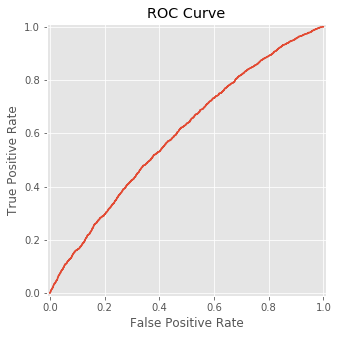

In [112]:
# Померить roc_auc на тесте

fpr, tpr, thresholds = roc_curve(y_test, predict_pr[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.title('ROC Curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
## Your Code Here

print('ROC_AUC: ', roc_auc_score(y_test, predict_pr[:,1]))

Ну как-то так